In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ipywidgets import interact
from matplotlib.animation import FuncAnimation

In [2]:

def read_data(path='data/last_data.data'):

    with open(path, 'rb') as file:
        temp = pickle.load(file)

    return temp

def load_btn_callback2(fname):
    d_list, _, _, _ = read_data('data/'+fname)

    return d_list

class PotentialShape():
    def __init__(self, L, W, V, cw=40):
        self.v_value = V
        self.L =L
        self.W = W
        self.center_x = int(self.L/2)
        self.center_y = int(self.W/2)
        self.width = 5
        self.a = 5
        self.canal_width = cw

    def single_barrier(self):
        Vtab = np.zeros((self.L, self.W))

        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(self.W):
                Vtab[i,j] = self.v_value

        return Vtab

    def single_slit(self):
        Vtab = self.single_barrier()

        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(int(self.W/2) - self.a, int(self.W/2) + self.a + 1):
                Vtab[i,j] = 0

        return Vtab
    def double_slit_wide(self):
        Vtab = self.single_barrier()

        for i in range(self.center_x - self.width, self.center_x + self.width + 1):
            for j in range(int(self.W/2) - 2*self.a - 8, int(self.W/2) + 2*self.a + 8 + 1):
                if j < int(self.W/2) - self.a or j > int(self.W/2) + self.a:
                    Vtab[i,j] = 0

        return Vtab

    def two_terminal_ring(self):
        Vtab = np.ones((self.L, self.W))
        Vtab = self.v_value * Vtab

        self.o_radius = 120
        self.i_radius = 80
        self.width = self.canal_width

        for i in range(self.center_x - self.o_radius, self.center_x + self.o_radius + 1):
            for j in range(self.center_y - self.o_radius, self.center_y + self.o_radius):
                if np.sqrt((i-self.center_x)**2 + (j-self.center_y)**2) > self.i_radius and np.sqrt((i-self.center_x)**2 + (j-self.center_y)**2) < self.o_radius:
                    Vtab[i, j] = 0

        for i in range(0, self.L):
            for j in range(self.center_y - int(self.width/2), self.center_y + int(self.width/2)):
                if i < self.center_x - self.i_radius or i > self.center_x + self.i_radius:
                    Vtab[i,j] = 0

        return Vtab
    
    def canal(self):

        Vtab = np.ones((self.L, self.W))
        Vtab = self.v_value * Vtab

        width = self.canal_width

        for i in range(0, self.L):
            for j in range(self.center_y - int(width/2), self.center_y + int(width/2)):
                    Vtab[i,j] = 0

        return Vtab

MovieWriter avconv unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


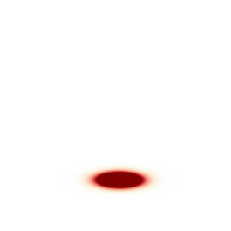

In [63]:
plt.rcParams["figure.figsize"] = (10,10)
data_list = load_btn_callback2("cyklotron_480pktdt20.data")

L = 400
W = 400
T_gate = 1050
R_gate = 600
#Vtab = PotentialShape(400, 400, 8*0.5).double_slit_wide()
Vtab = []
x_list = np.linspace(0, L, L)
y_list = np.linspace(0, W, W)

X, Y = np.meshgrid(x_list,y_list)

def anim(index):
    Z = np.resize(data_list[index], (L,W))
    Z = Z.transpose()
    Z = np.abs(Z*Z.conj())
    
    #ax.collections = []
    #ax.contour(X,Y,Z, colors="black", alpha=0.3, levels=20)
    image.set_array(Z)
    
    
    
    

Z = np.resize(data_list[0], (L,W))
Z = Z.transpose()
Z = np.abs(Z*Z.conj())

    
#################################colormap
from matplotlib.colors import LinearSegmentedColormap

ncolors = 256
color_array = plt.get_cmap('OrRd')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='OrRd_alpha',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

#################
fig, ax = plt.subplots(figsize=(4, 4))

image = ax.imshow(Z,extent=[0,L,0,W],origin="lower", cmap ="OrRd_alpha", vmin=10**(-10), vmax=float(0.0005), animated=True)
#cont = ax.contour(X,Y,Z, colors="black", alpha=0.3, levels=20)

#plt.style.use("seaborn-colorblind")
plt.rcParams['font.family'] = 'sans-serif'
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
#ax.axis('off')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

fig.patch.set_alpha(0.)






#plt.colorbar()
#plt.imshow(Vtab.transpose(), extent=[0,400,0,400],origin="lower", cmap="gray_r")

#plt.axvline(T_gate, ymin=0, ymax=1, c="r", label="gate")
#plt.axvline(R_gate, ymin=0, ymax=1, c="r", label="gate")
ax.set_ylim(50, 300)
ax.set_xlim(75, 325)

#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(100))

plt.rcParams['animation.writer'] = 'avconv'

#plt.savefig('visualizations/double_slit_wide.png', dpi=200, bbox_inches='tight')


anim2 = FuncAnimation(fig, anim, interval=50, frames=100)


#plt.draw()
#plt.show()
anim2.save('anim_test.gif', codec="png", dpi=50 ,savefig_kwargs={'transparent': True, 'facecolor': 'none'})

#interact(plot_function, index=(0,len(data_list), 1))


In [12]:
print(len(data_list))


101
